In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
cpu = pd.read_csv("data/cpu_rating.csv", index_col="id")
gpu = pd.read_csv("data/gpu_rating.csv", index_col="id")

In [4]:
cpu

,cpu,rate,url
id,,,
1,3200u,68,https://versus.com/ru/amd-ryzen-3-3200u
2,7100,72,https://versus.com/ru/intel-core-i3-7100
3,7500,72,https://versus.com/ru/intel-core-i5-7500
4,8130u,59,https://versus.com/ru/intel-core-i3-8130u
5,8250u,60,https://versus.com/ru/intel-core-i5-8250u
...,...,...,...
199,intel сore i7 9700f,60,https://versus.com/ru/intel-core-i7-9700f
200,intel сore i7-9700f,60,https://versus.com/ru/intel-core-i7-9700f
201,intet core i7 7700,76,https://versus.com/ru/intel-core-i7-7700


In [5]:
gpu

,gpu,rate,url
id,,,
1,amd radeon 460 + intel hd graphics 630,55.0,https://versus.com/ru/amd-radeon-rx-460
2,amd radeon 520,37.0,https://versus.com/ru/amd-radeon-520
3,amd radeon 530,35.0,https://versus.com/ru/amd-radeon-530
4,amd radeon 530 + intel uhd graphics 620,35.0,https://versus.com/ru/amd-radeon-530
5,amd radeon 530 + intel uhd graphics 630,35.0,https://versus.com/ru/amd-radeon-530
...,...,...,...
274,rtx 2070 super 8gb,87.0,https://versus.com/ru/nvidia-geforce-rtx-2070-...
275,rtx 2080 + intel uhd 630,86.0,https://versus.com/ru/nvidia-geforce-rtx-2080
276,rtx 2080 super,91.0,https://versus.com/ru/nvidia-geforce-rtx-2080-...


In [6]:
cpu.rate.mean()

62.420212765957444

Text(0.5, 1.0, 'CPU Ratings Distribution')

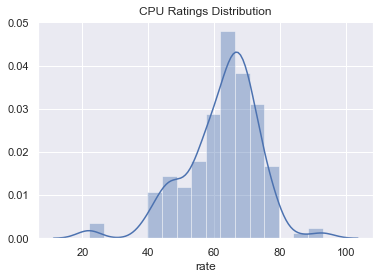

In [7]:
sns.distplot(cpu.rate).set_title("CPU Ratings Distribution")

In [12]:
gpu.rate.mean()

48.42030651340996

Text(0.5, 1.0, 'GPU Ratings Distribution')

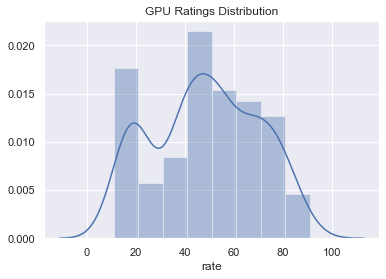

In [8]:
sns.distplot(gpu.rate).set_title("GPU Ratings Distribution")

In [16]:
cpu[cpu.rate == cpu.rate.max()]

,cpu,rate,url
id,,,
110,intel core i7 9750h,93,https://versus.com/ru/intel-core-i7-9750h
114,intel core i7-9750h,93,https://versus.com/ru/intel-core-i7-9750h


In [17]:
cpu[cpu.rate == cpu.rate.min()]

,cpu,rate,url
id,,,
34,celeron n4000,22,https://versus.com/ru/intel-celeron-n4000
51,intel celeron n4000,22,https://versus.com/ru/intel-celeron-n4000
123,intel pentium n4000,22,https://versus.com/ru/intel-celeron-n4000


In [9]:
gpu[gpu.rate == gpu.rate.max()]

,gpu,rate,url
id,,,
276,rtx 2080 super,91.0,https://versus.com/ru/nvidia-geforce-rtx-2080-...


In [18]:
gpu[gpu.rate == gpu.rate.min()]

,gpu,rate,url
id,,,
47,intel hd graphics 4400,11.0,NaN


In [11]:
weak_gpus = gpu[gpu.rate <= 40]
middle_gpus = gpu[(gpu.rate < 60) & (gpu.rate > 40)]
higher_gpus = gpu[gpu.rate >= 60]

In [13]:
pd.cut(gpu.rate, bins=3).value_counts()

(37.667, 64.333]    117
(10.92, 37.667]      73
(64.333, 91.0]       71
Name: rate, dtype: int64